In [1]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

In [2]:
FS_1 = 44100
FS_2 = 8000
DURATION = 5

In [13]:
def defineTime (SIGNAL, FS):
    TS = 1/FS
    TIME = np.arange (0,DURATION, TS)
    return TIME

In [6]:
inp_1 = sd.rec(DURATION*FS_1, samplerate=FS_1, channels=2, dtype='float')
print('Recording inp_1...')
sd.wait()
print('Recording finished')

Recording inp_1...
Recording finished


In [7]:
inp_2 = sd.rec(DURATION*FS_2, samplerate=FS_2, channels=2, dtype='float')
print('Recording inp_2...')
sd.wait()
print('Recording finished')

Recording inp_2...
Recording finished


In [8]:
wav.write('out_44khz.wav',FS_1, inp_1)
wav.write('out_8khz.wav', FS_2, inp_2)

In [9]:
FS_1, OUT_1 = wav.read('out_44khz.wav')
FS_2, OUT_2 = wav.read('out_8khz.wav')

In [10]:
print('Playing started')
sd.wait()
sd.play(OUT_1,FS_1)
sd.wait()
print('Playing stopped')

Playing started
Playing stopped


In [11]:
print('Playing started')
sd.wait()
sd.play(OUT_2,FS_2)
sd.wait()
print('Playing stopped')

Playing started
Playing stopped


In [14]:
TIME_1 = defineTime(OUT_1, FS_1)
TIME_2 = defineTime(OUT_2, FS_2)

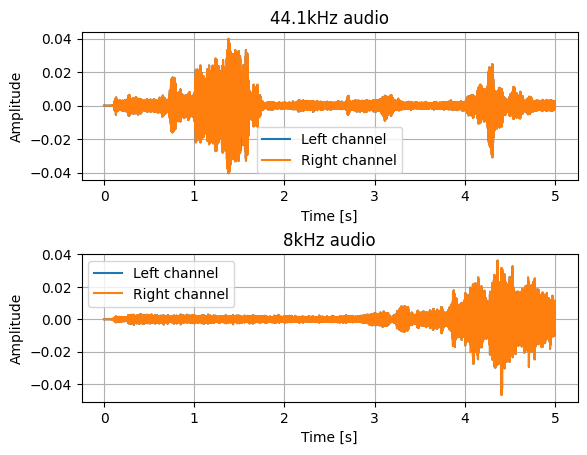

In [21]:
plt.subplot(211)
plt.plot(TIME_1, OUT_1[:,0], label = 'Left channel')
plt.plot(TIME_1, OUT_1[:,1], label = 'Right channel')
plt.legend()
plt.grid()
plt.title('44.1kHz audio')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.plot(TIME_2, OUT_2[:,0], label = 'Left channel')
plt.plot(TIME_2, OUT_2[:,1], label = 'Right channel')
plt.legend()
plt.grid()
plt.title('8kHz audio')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplots_adjust(hspace = 0.5)
plt.show()